In [59]:
%load_ext autoreload
%autoreload 2
import json
import yaml
import networkx as nx
from pathlib import Path
from parse_students import parse_student_info
from normalize_interests import normalize_interests, load_mapping
from create_bipartite_graph import create_bipartite_graph, visualize_bipartite_graph

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Parsing HTML files

In [60]:
doc_info_dict = parse_student_info("data/raw/doctoral-fellows.html")
postdoc_info_dict = parse_student_info("data/raw/postdoc-fellows.html")

# Save as JSON to data/processed
with open("data/processed/doc_info_dict.json", "w") as f:
    json.dump(doc_info_dict, f)
with open("data/processed/postdoc_info_dict.json", "w") as f:
    json.dump(postdoc_info_dict, f)

# Combine & Clean Data

In [61]:
aoi_info_dict = doc_info_dict | postdoc_info_dict

In [62]:
aoi_mappoing = load_mapping('data/meta/aoi_mapping.yaml')

In [63]:
# Normalize all values of aoi_info_dict and map them to the canonical terms
for key, values in aoi_info_dict.items():
    normalized_values = normalize_interests(values, aoi_mappoing)
    aoi_info_dict[key] = normalized_values

In [64]:
# Save the normalized aoi_info_dict as yaml
with open("data/processed/aoi_info_dict.yaml", "w") as f:
    yaml.dump(aoi_info_dict, f)

# Visualize the Graph

In [65]:
G = create_bipartite_graph(aoi_info_dict)

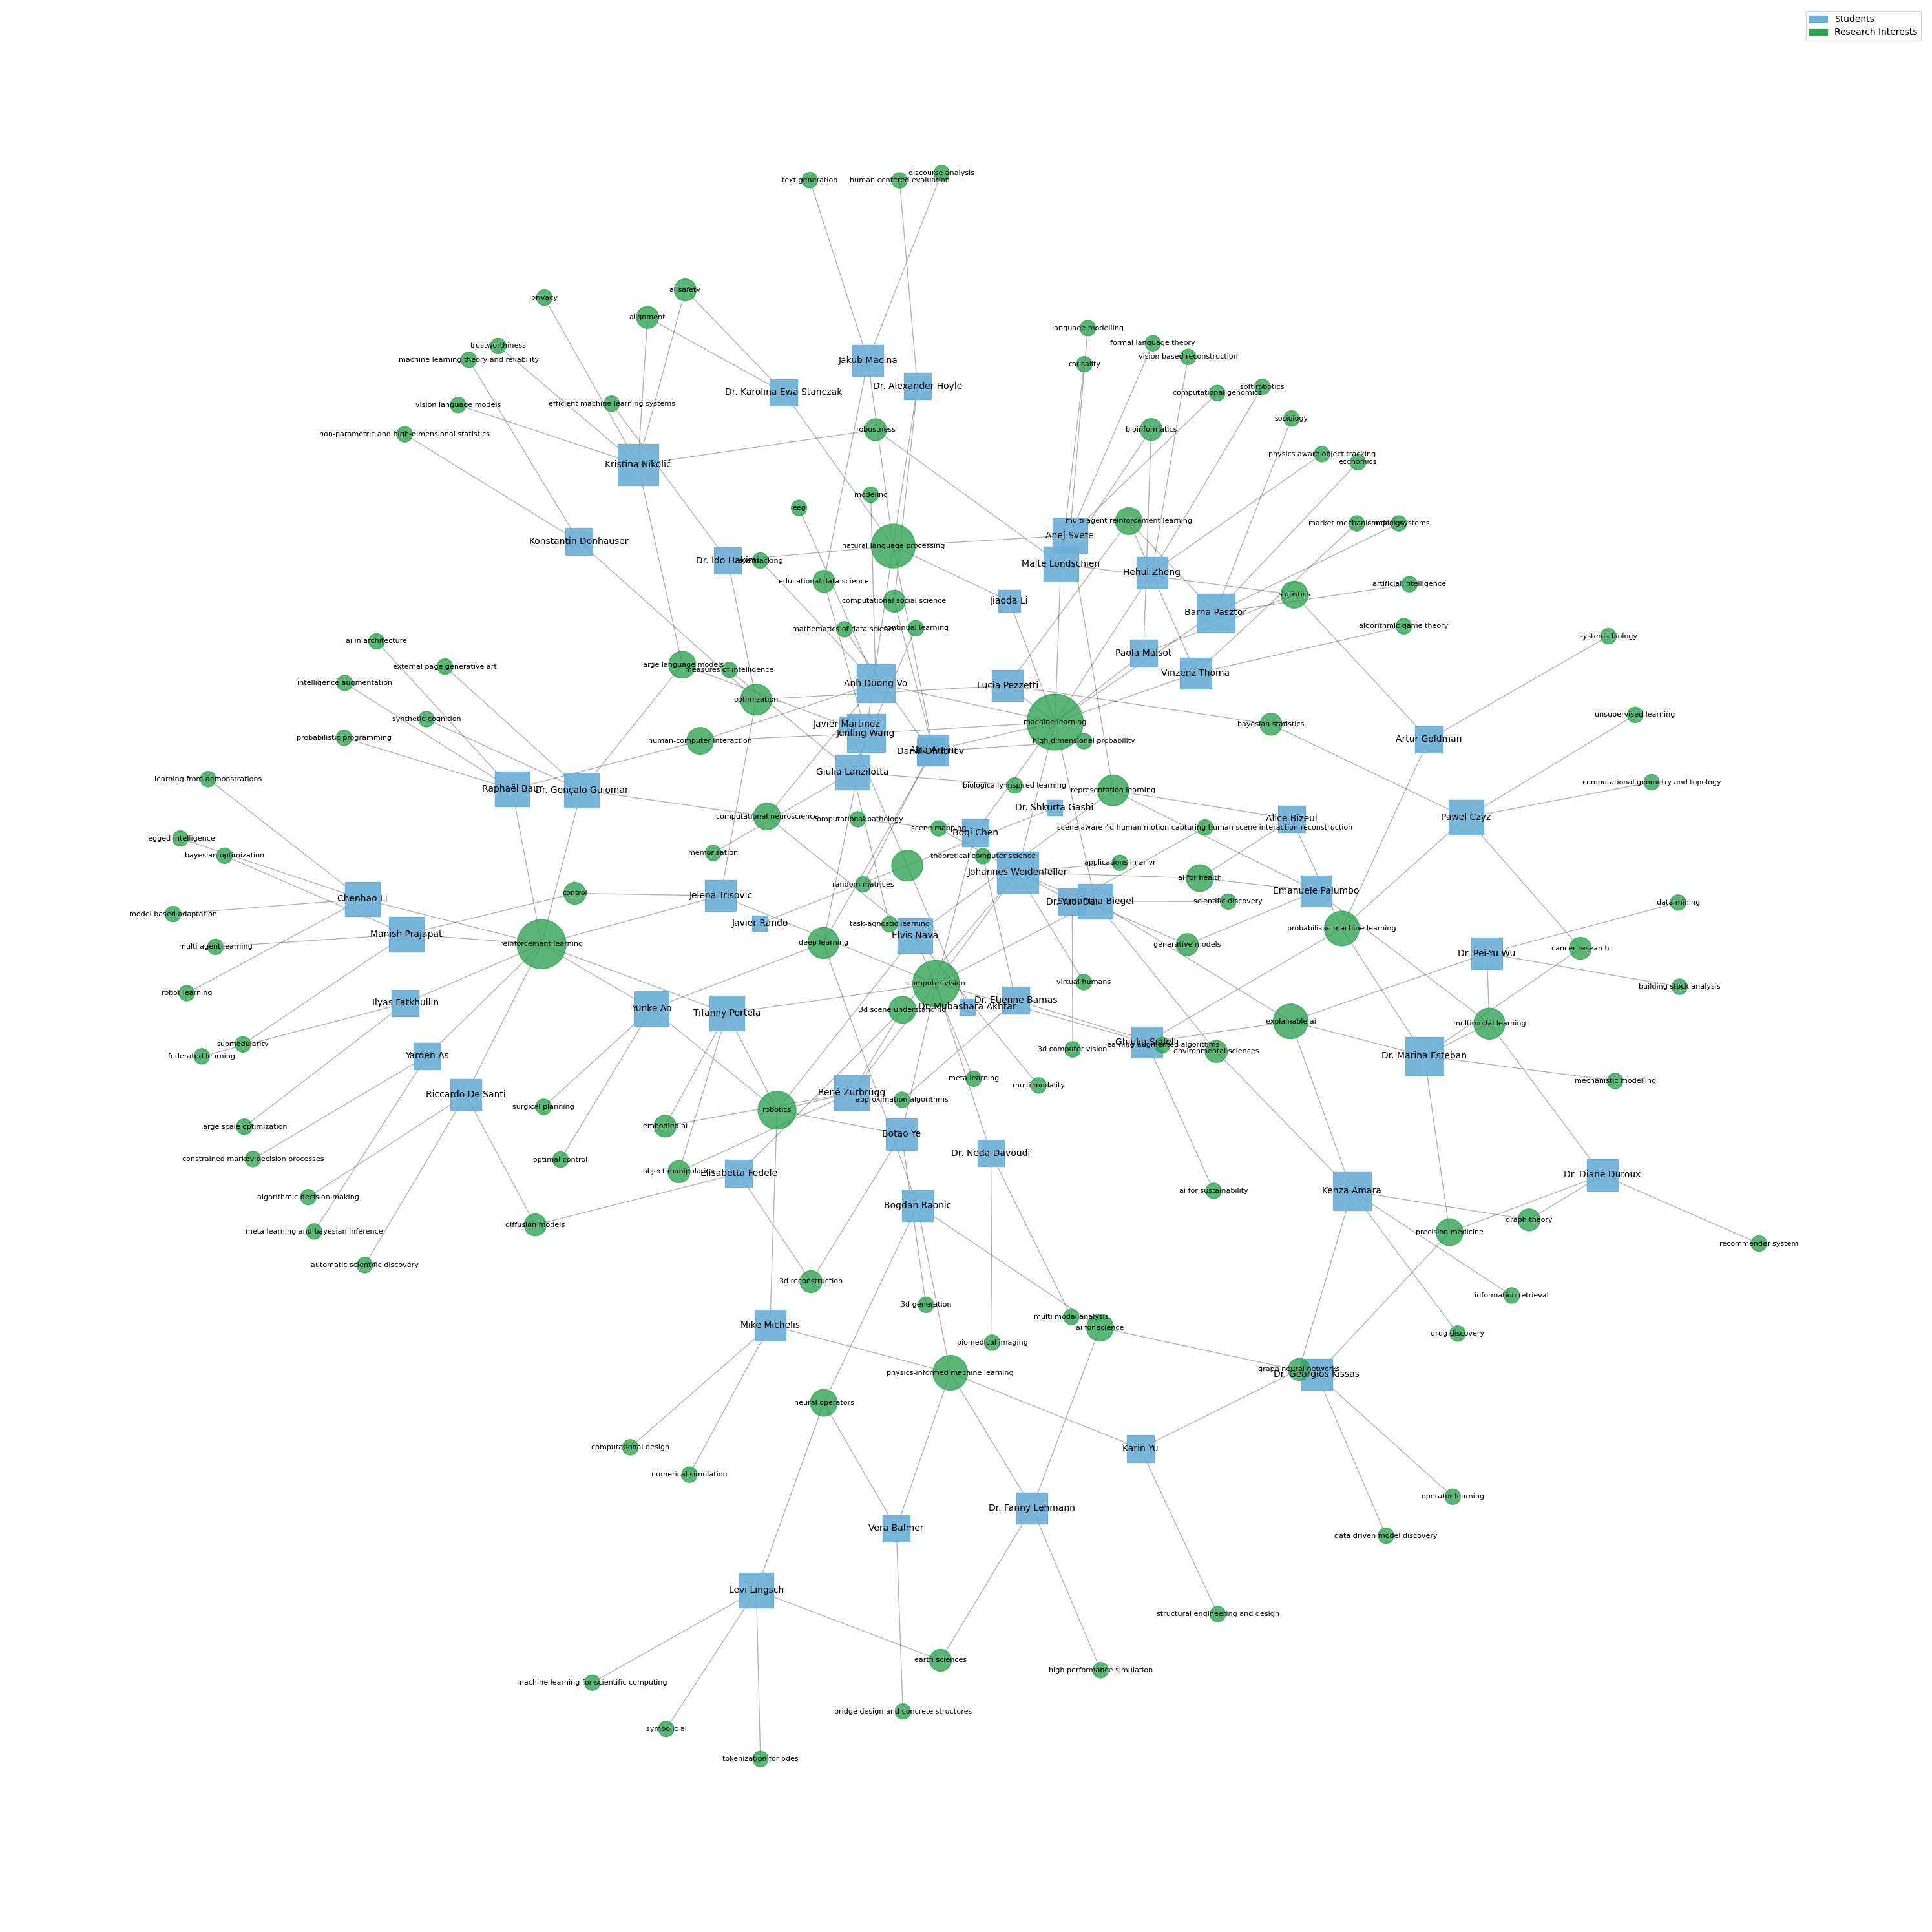

In [68]:
visualize_bipartite_graph(G, output_path=Path('figures/aoi_graph.png'))